In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt



In [14]:
import tensorflow as tf
import numpy as np
import os

# location = os.getcwd()
# for event in tf.train.summary_iterator(os.path.join(location, 'paper\\logs\\env_w_32_2\\events.out.tfevents.1604387438.c7266f2e050e')):
#     for value in event.summary.value:
#         print(value.tag)
#         if value.HasField('simple_value'):
#             print(value.simple_value)
            
location = os.getcwd()
ls = []
for event in tf.train.summary_iterator(os.path.join(location, 'paper\\logs\\env_w_32_2\\events.out.tfevents.1604387438.c7266f2e050e')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
np.savetxt('paper.txt', ls)

In [15]:
location = os.getcwd()
ls = []
for event in tf.train.summary_iterator(os.path.join(location, 'envelope_w_32_no_ckpt_new_approach_2\\logs\\events.out.tfevents.1604740680.e3d3989ca740')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
for event in tf.train.summary_iterator(os.path.join(location, 'envelope_w_32_no_ckpt_new_approach_2\\logs\\events.out.tfevents.1604773459.1171f76420b7')):
    for value in event.summary.value:
        if value.tag=="loss":
            ls.append(value.simple_value)
np.savetxt('proposed.txt', ls)


In [17]:
paper = np.loadtxt('paper.txt')
proposed = np.loadtxt('proposed.txt')

In [28]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

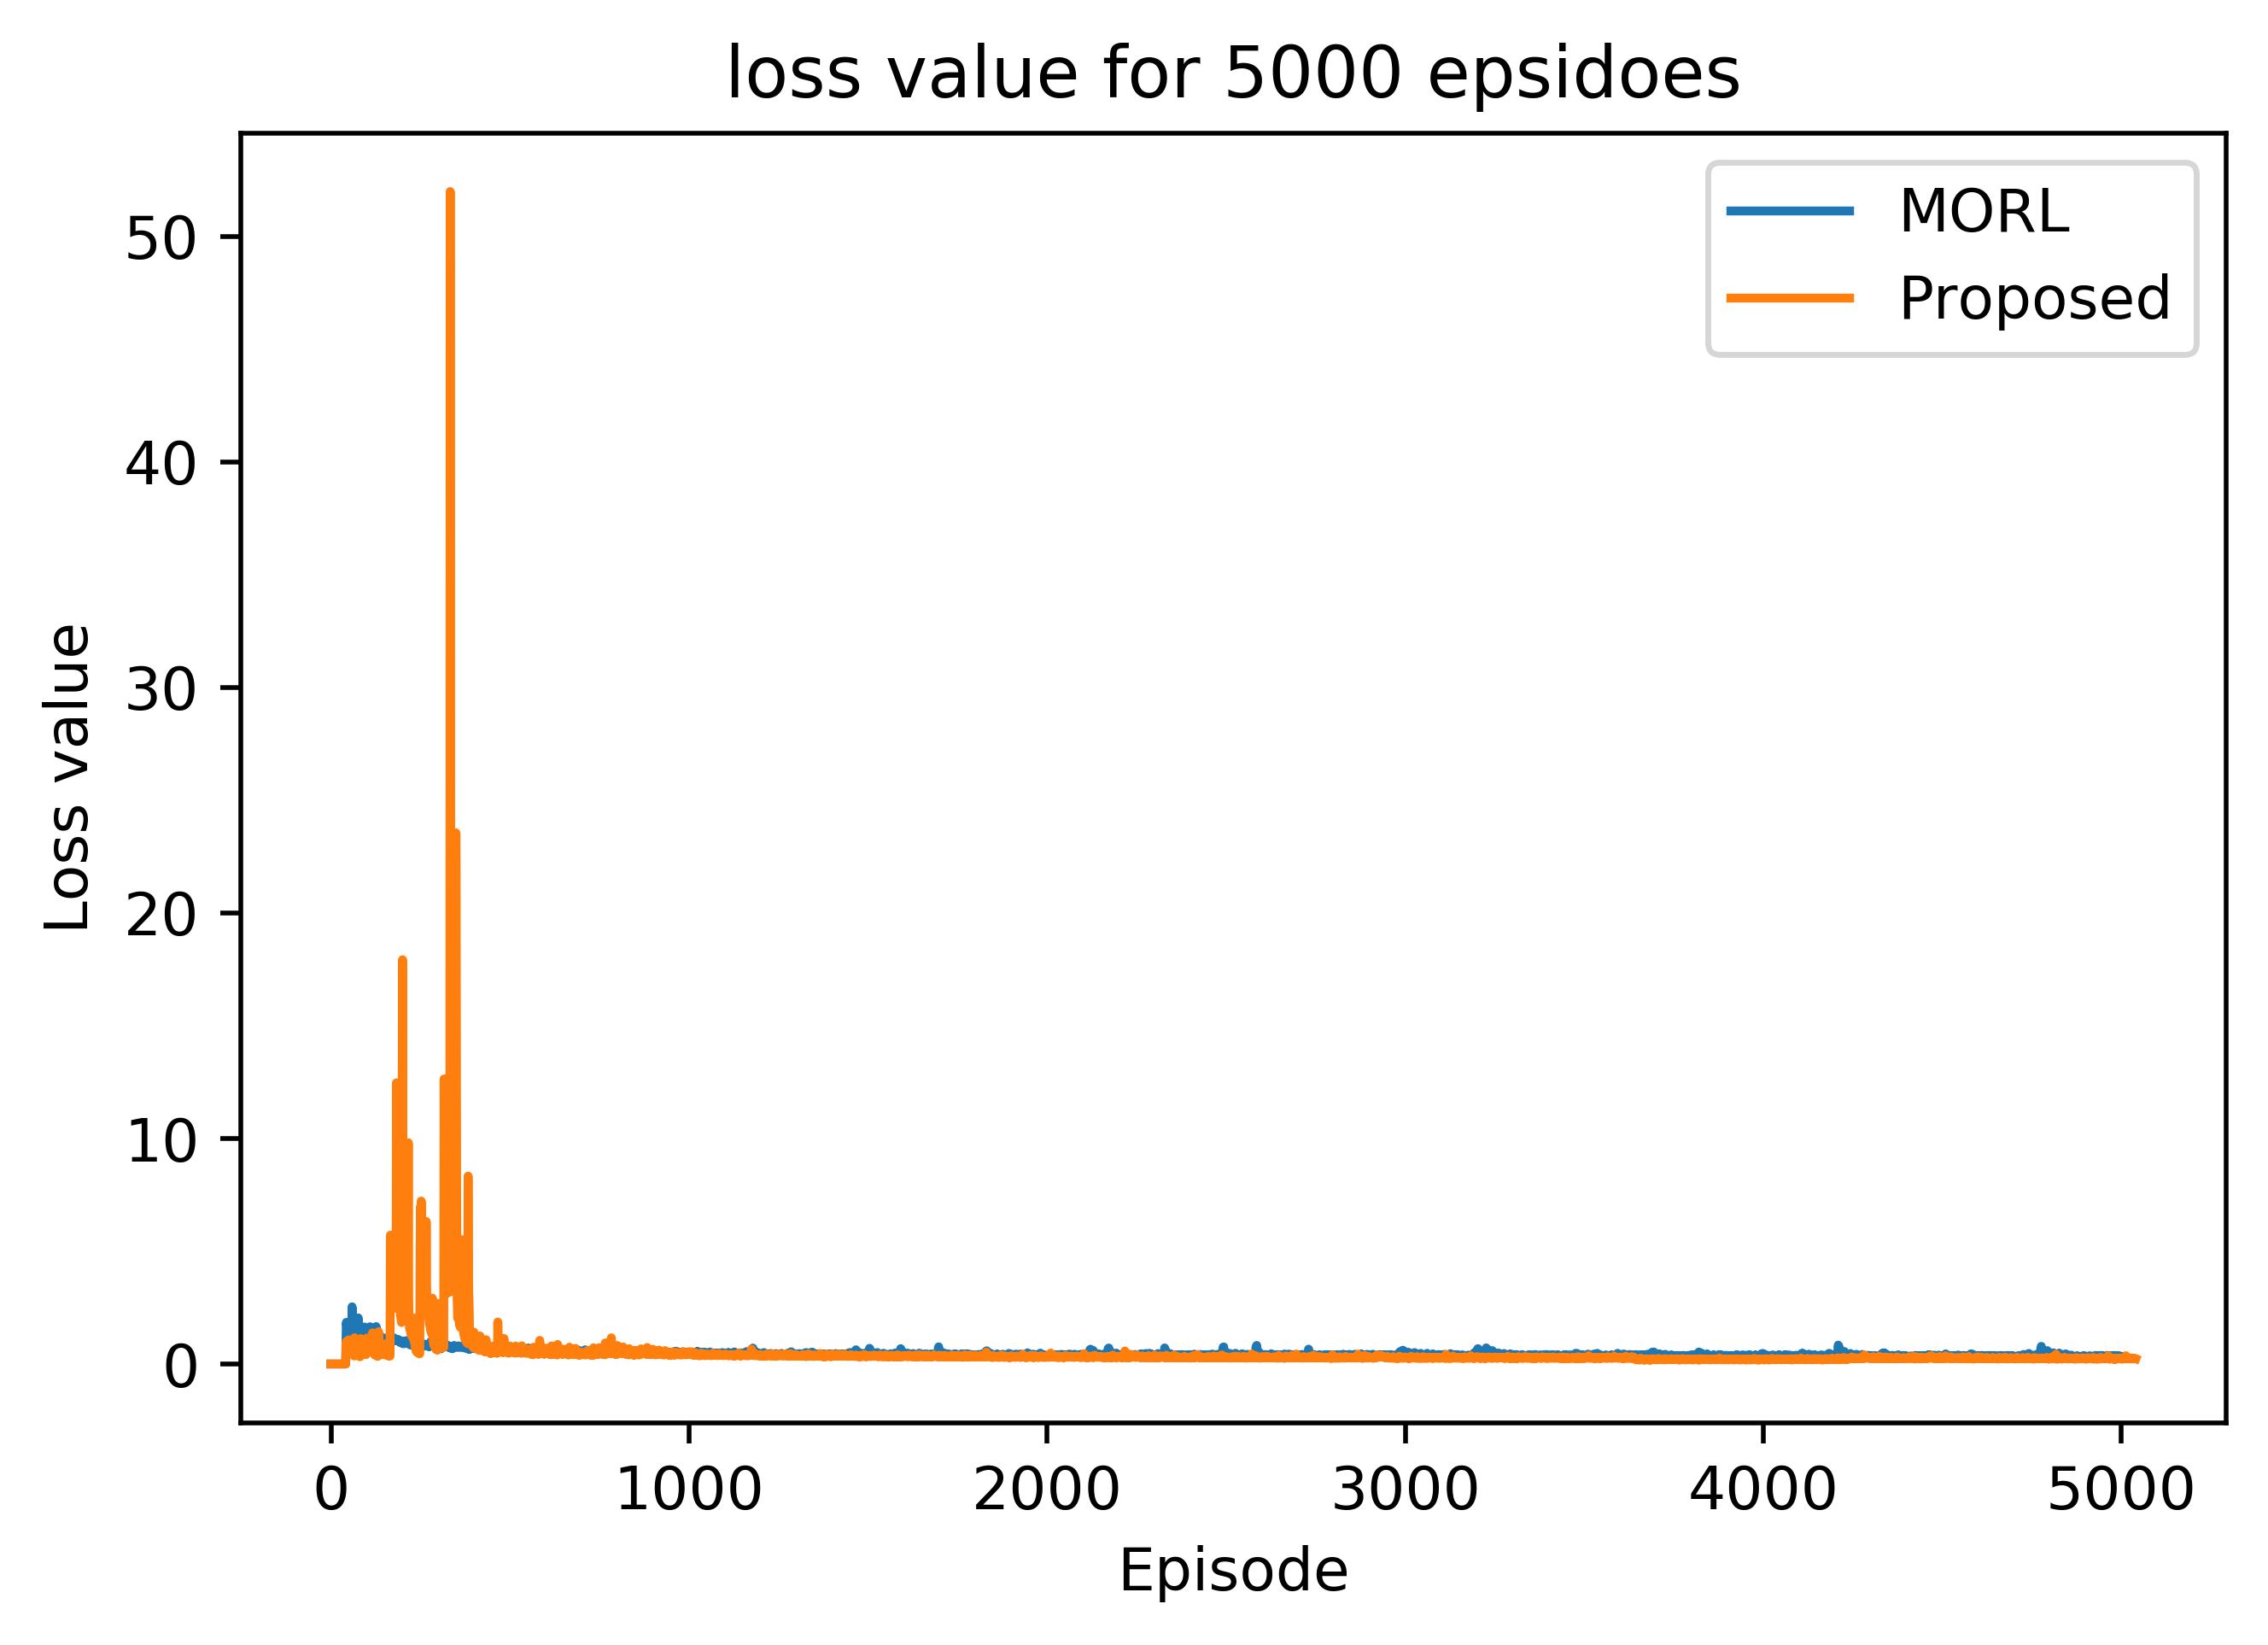

In [33]:
x = np.linspace(0, 5000)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(paper, label='MORL')  # Plot some data on the axes.
ax.plot(proposed, label='Proposed')  # Plot more data on the axes...
ax.set_xlabel('Episode')  # Add an x-label to the axes.
ax.set_ylabel('Loss value')  # Add a y-label to the axes.
ax.set_title("loss value for 5000 epsidoes")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.savefig('full_loss.pdf', format="pdf")

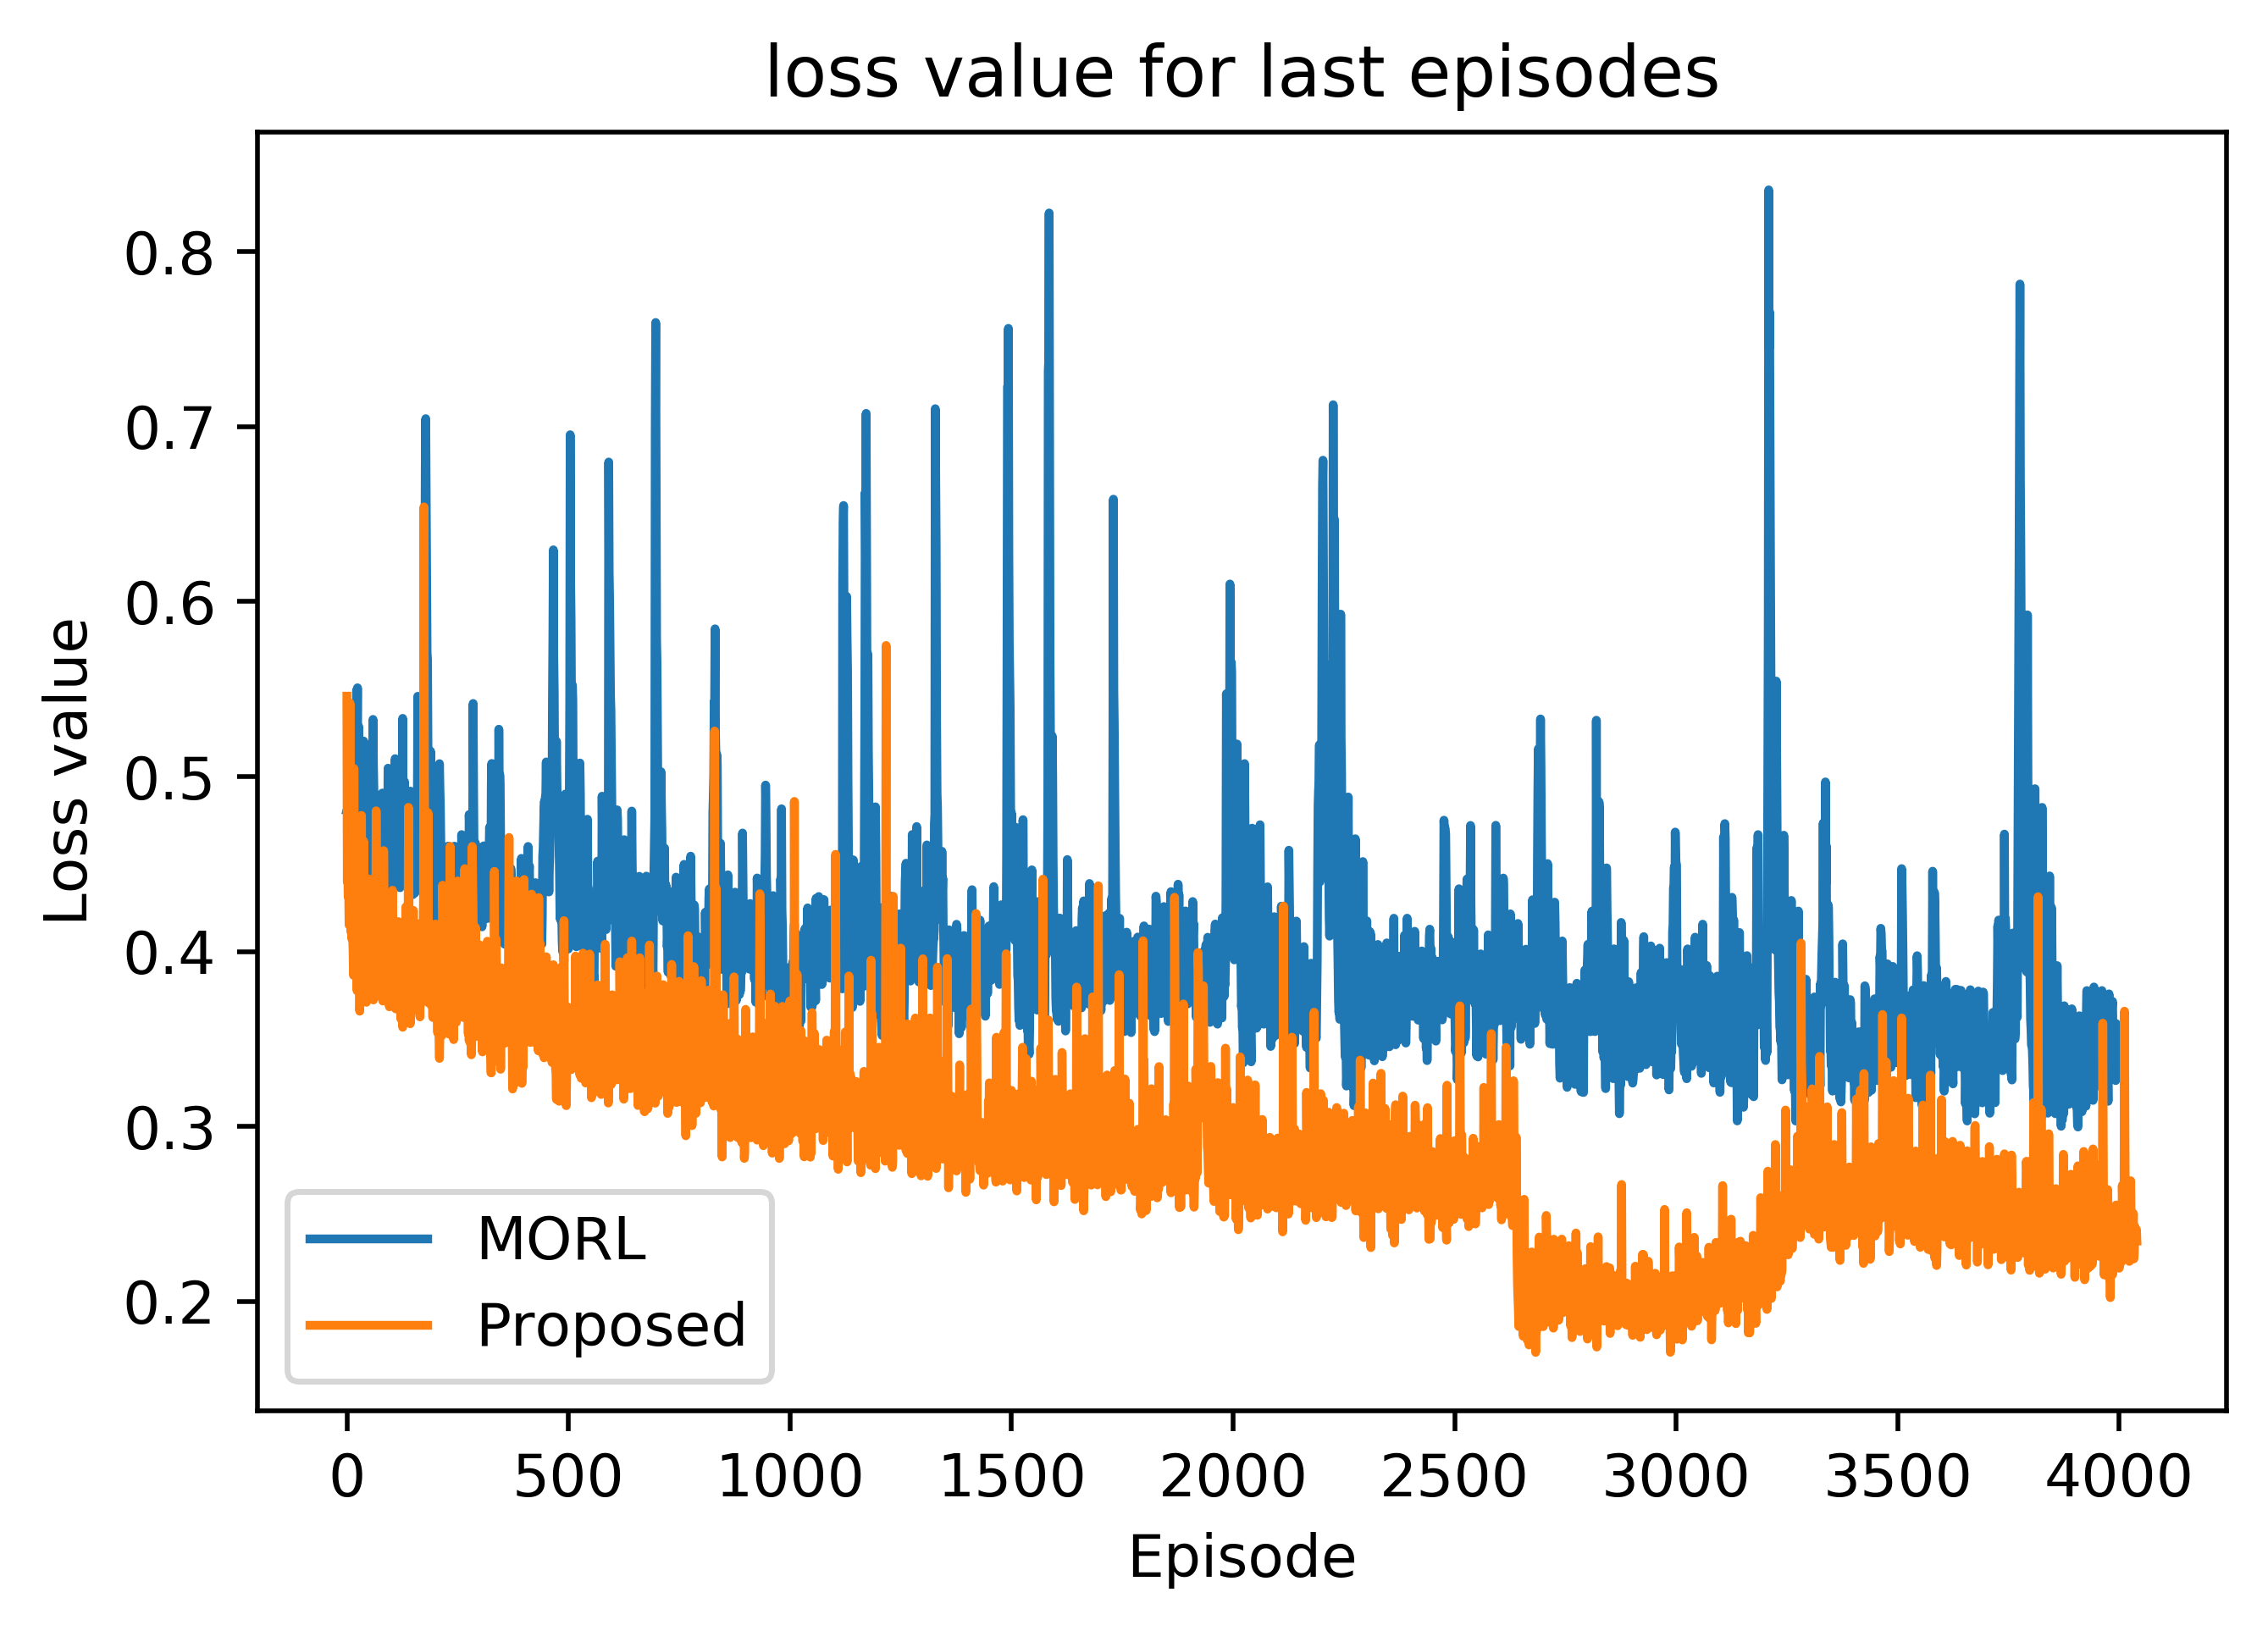

In [34]:
x = np.linspace(1000, 5000)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(paper[1000:], label='MORL')  # Plot some data on the axes.
ax.plot(proposed[1000:], label='Proposed')  # Plot more data on the axes...
ax.set_xlabel('Episode')  # Add an x-label to the axes.
ax.set_ylabel('Loss value')  # Add a y-label to the axes.
ax.set_title("loss value for last episodes")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.savefig('partial_loss.pdf', format="pdf")